# Project: Wrangling and Analyze Data

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests as r
import json
import re

pd.set_option('display.max_colwidth', 700)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
tweet1 = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
tweet1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [4]:
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
# get the number of rows and columns of the data
tweet1.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = r.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [7]:
tweet2 = pd.read_csv('image-predictions.tsv', sep='\t')
tweet2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [8]:
tweet1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
tweet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# get the number of rows and columns of the data\
tweet2.shape

(2075, 12)

In [11]:
tweet2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
# i was no enable to get s developers account for twitter so i used the tweet_json.txt file

dogs_tweets = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        record = json.loads(line)
        dogs_tweets.append(record)

In [13]:
# convert the dogs_tweets file to a datafame
# we only need three columns 'id', 'retweet_count', 'favorite_count'. let's extarct it

cols = ['id', 'retweet_count', 'favorite_count']

tweet3 = pd.DataFrame(dogs_tweets, columns= cols)
tweet3.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [14]:
tweet3.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [15]:
tweet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
tweet3.shape

(2354, 3)

## Merge the Data

1. I will rename the id columns so that it will be easy for me to merge
2. Merge the three data on the id_tweet which is the unique columns

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1. Missing values in 6 columns **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**, and  **expanded_urls**

2. **breed** column replace _ with space.

3. **timestamp** is a datetime not an object.

4. **rating_numerators** change to float dtype

5. Replace the NaN values with None

6. **rating_denominator** change to int

7. In **text** column, we need to extract the **ratings**

8. **id** column for tweet3 data should be renamed to **tweet_id**

### Tidiness issues
1. **doggo**, **floofer**, **pupper** and **puppo** columns need to be cleaned to fit into the rule of tidy data which states Each variables forms a column and Ecah observation forms a row

2. We need to extract only information of dogs in image-predictions.tsv. To get this done i used `np.select()`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
data1 = tweet1.copy()
data2 = tweet2.copy()
data3 = tweet3.copy()

### Issue #1: These are the issues in this data

- The rule of tidy data says Each variables forms a columns and each observation forms forma a row. This is what we try to implement in **data1**.
- `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp` have many missing values. To clean this data we need to drop the rows with values first before dropping the columns.

#### Define:

- Tidy the 'doggo', 'floofer', 'pupper', 'puppo' columns
- drop `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp` columns.
- Extract the rating from the text column using regular expression
- Replace NaN values with `None`.
- Drop the previous raing columns.

#### Code

In [18]:
#create a list for the dog stages
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

#create the column in twitter archive and replace none with nan
data1[dog_stages] = data1[dog_stages].replace('None', np.nan)

# create a function to join all values
def join_all(x):
    return ', '.join(x.dropna().astype(str))

In [19]:
data1['dog_stages'] = data1[dog_stages].apply(join_all, axis=1)

#replace empty string with nan
data1['dog_stages'] = data1['dog_stages'].replace('', np.nan)

In [20]:
# drop doggo, floofer, pupper, puppo columns
data1.drop(columns= ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stages                  380 n

In [22]:
data1['dog_stages'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [23]:
# get the index of not null for retweet
retweeted = data1[pd.notnull(data1['retweeted_status_id'])]

In [24]:
retweeted.index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [25]:
data1.drop(retweeted.index, axis = 0, inplace = True)

In [26]:
# get the index of not null for replies
reply = data1[pd.notnull(data1['in_reply_to_status_id'])]

In [27]:
reply.index

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [28]:
# drop the indexes
data1.drop(reply.index, axis = 0, inplace = True)

In [29]:
# drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
# and retweeted_status_timestamp  columns

data1.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                        'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

In [30]:
# expanded_urls column has 3 missing values
data1[data1.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,12,10,None,NaN
707,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,NaN
1445,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,pupper


In [31]:
# let's replace the missing values in expanded_urls with None
data1.expanded_urls = data1.expanded_urls.replace(np.nan, 'None')

In [32]:
data1.dog_stages.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [33]:
data1['rating_numerators'] = data1.text.apply(lambda x: re.findall(r'\d+\/\d+', x)[-1].split("/")[0])
data1['rating_denomerators'] = data1.text.apply(lambda x: re.findall(r'\d+\/\d+', x)[-1].split("/")[1])

In [34]:
# i have to drop the old columns of rating numerator and rating denominators

data1.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             2097 non-null   int64 
 1   timestamp            2097 non-null   object
 2   source               2097 non-null   object
 3   text                 2097 non-null   object
 4   expanded_urls        2097 non-null   object
 5   name                 2097 non-null   object
 6   dog_stages           336 non-null    object
 7   rating_numerators    2097 non-null   object
 8   rating_denomerators  2097 non-null   object
dtypes: int64(1), object(8)
memory usage: 163.8+ KB


In [36]:
data1.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,rating_numerators,rating_denomerators
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,13,10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,13,10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,12,10


### Issue #2:
- We require only the details of dogs only, so we need to filter out information about dogs


#### Define

- Filter only information with dogs using `np.select`.
- drop the columns that are no longer needed

#### Code

In [37]:
# Using np.select to filter out the information of dogs only

condition = [(data2['p1_dog'] == True), (data2['p2_dog'] == True), (data2['p3_dog'] == True)]

breed = [data2['p1'],data2['p2'], data2['p3']]

confidence =  [data2['p1_conf'],data2['p2_conf'], data2['p3_conf']]

data2['breed'] = np.select(condition, breed, default='None')

data2['conf'] = np.select(condition, confidence, default=0.0)

In [38]:
# drop p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns

data2.drop(columns= ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace = True)

In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   breed     2075 non-null   object 
 4   conf      2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


In [40]:
data3.rename(columns = {'id':'tweet_id'}, inplace = True)

In [41]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [42]:
# let's merge the three data set (data1, data2 and data3)
# merge the data2 and data3 columns

merging = pd.merge(data2, data3, on='tweet_id', how='left')

In [43]:
merging.head(3)

,tweet_id,jpg_url,img_num,breed,conf,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,532.0,2535.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,48.0,132.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,47.0,128.0


In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             2097 non-null   int64 
 1   timestamp            2097 non-null   object
 2   source               2097 non-null   object
 3   text                 2097 non-null   object
 4   expanded_urls        2097 non-null   object
 5   name                 2097 non-null   object
 6   dog_stages           336 non-null    object
 7   rating_numerators    2097 non-null   object
 8   rating_denomerators  2097 non-null   object
dtypes: int64(1), object(8)
memory usage: 163.8+ KB


In [45]:
# merge data1 and merging data

tweets_data = pd.merge(data1, merging, on='tweet_id', how='left')

In [46]:
# change the dtype of rating_numerators and rating_denominators

tweets_data['rating_numerators'] = tweets_data['rating_numerators'].astype(float)
tweets_data['rating_denomerators'] = tweets_data['rating_denomerators'].astype(int)

In [47]:
# replace _ to splace in the name column
tweets_data['breed'] = tweets_data['breed'].str.replace('_', ' ')

In [48]:
# change the timestamp to datetime
tweets_data['timestamp'] = tweets_data["timestamp"].astype('datetime64[ns]')

In [49]:
# drop columns that are not important in my analysis

tweets_data.drop(columns = ['expanded_urls', 'source', 'text', 'timestamp', 'jpg_url'], axis = 1, inplace = True)

#### Test

In [50]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2097 non-null   int64  
 1   name                 2097 non-null   object 
 2   dog_stages           336 non-null    object 
 3   rating_numerators    2097 non-null   float64
 4   rating_denomerators  2097 non-null   int32  
 5   img_num              1971 non-null   float64
 6   breed                1971 non-null   object 
 7   conf                 1971 non-null   float64
 8   retweet_count        1971 non-null   float64
 9   favorite_count       1971 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 172.0+ KB


In [51]:
tweets_data.head(3)

,tweet_id,name,dog_stages,rating_numerators,rating_denomerators,img_num,breed,conf,retweet_count,favorite_count
0,892420643555336193,Phineas,NaN,13.0,10,1.0,None,0.000000,8853.0,39467.0
1,892177421306343426,Tilly,NaN,13.0,10,1.0,Chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,Archie,NaN,12.0,10,1.0,Chihuahua,0.716012,4328.0,25461.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
tweets_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [53]:
df_tweets = pd.read_csv("twitter_archive_master.csv")

In [54]:
df_tweets.head()

,tweet_id,name,dog_stages,rating_numerators,rating_denomerators,img_num,breed,conf,retweet_count,favorite_count
0,892420643555336193,Phineas,NaN,13.0,10,1.0,None,0.000000,8853.0,39467.0
1,892177421306343426,Tilly,NaN,13.0,10,1.0,Chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,Archie,NaN,12.0,10,1.0,Chihuahua,0.716012,4328.0,25461.0
3,891689557279858688,Darla,NaN,13.0,10,1.0,Labrador retriever,0.168086,8964.0,42908.0
4,891327558926688256,Franklin,NaN,12.0,10,2.0,basset,0.555712,9774.0,41048.0


In [55]:
# let's know the breed that has a good prediction with the Algorithm
confidence = df_tweets.groupby('breed')['conf'].sum().reset_index()

In [56]:
# top 10 breed that made a good prediction

breed_conf = confidence.sort_values(by=['conf'], ascending=False)[:10]

In [57]:
breed_conf

,breed,conf
90,golden retriever,101.708278
50,Pembroke,63.982283
37,Labrador retriever,62.738608
16,Chihuahua,46.893217
102,pug,41.406287
56,Samoyed,30.132478
51,Pomeranian,28.680582
82,chow,25.777592
109,toy poodle,23.343891
23,French bulldog,20.539759


In [58]:
# breed that got the highest rating
rating = df_tweets.groupby('breed')['rating_numerators'].sum().reset_index()

In [59]:
# Top 10 breed with the highest rating breed

breed_rated = rating.sort_values(by=['rating_numerators'], ascending=False)[:10]

In [60]:
breed_rated

,breed,rating_numerators
44,None,5128.0
90,golden retriever,1908.0
37,Labrador retriever,1448.0
50,Pembroke,1070.0
16,Chihuahua,942.0
82,chow,680.0
102,pug,635.0
109,toy poodle,550.0
51,Pomeranian,502.0
56,Samoyed,491.0


In [61]:
# Dog breed with the highest retweet
retweet= df_tweets.groupby('breed')['retweet_count'].sum().reset_index()

In [62]:
# Top 10 dog breed with the highest retweet

retweet.sort_values(by=['retweet_count'], ascending=False)[:10]

,breed,retweet_count
44,None,765990.0
90,golden retriever,586657.0
37,Labrador retriever,405404.0
50,Pembroke,291771.0
16,Chihuahua,250722.0
56,Samoyed,203446.0
23,French bulldog,156230.0
84,cocker spaniel,145743.0
82,chow,131025.0
102,pug,118682.0


In [63]:
# number of unique dog breed
df_tweets.breed.nunique()

114

In [64]:
# maximum retweet_counts
df_tweets.retweet_count.max()

79515.0

In [65]:
# Labrador retriever breed has the highest retweet_counts
df_tweets[df_tweets['retweet_count'] == 79515.0]

,tweet_id,name,dog_stages,rating_numerators,rating_denomerators,img_num,breed,conf,retweet_count,favorite_count
825,744234799360020481,None,doggo,13.0,10,1.0,Labrador retriever,0.825333,79515.0,131075.0


### Insights:
1. The breed that has the higest confidence is `golden retriever`.

2. The maximum number of retweet for the dogs is `79515.0` which is the `Labrador retriever` breed.

3. Our data contains `113` dog breeds with **None** value exclusive.

### Visualization

In [66]:
breed_values = df_tweets['breed'].value_counts().index
breed_counts = df_tweets['breed'].value_counts().values

In [67]:
breed_values

Index(['None', 'golden retriever', 'Labrador retriever', 'Pembroke',
       'Chihuahua', 'pug', 'toy poodle', 'chow', 'Samoyed', 'Pomeranian',
       ...
       'black-and-tan coonhound', 'Sussex spaniel', 'Bouvier des Flandres',
       'clumber', 'Scotch terrier', 'EntleBucher', 'Japanese spaniel',
       'standard schnauzer', 'silky terrier', 'Irish wolfhound'],
      dtype='object', length=114)

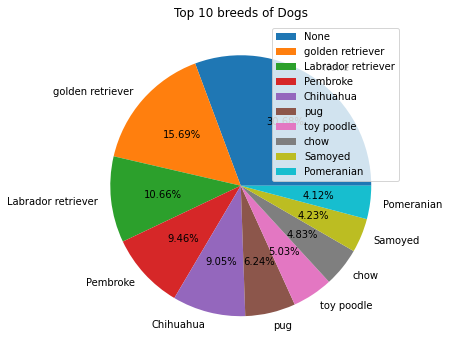

In [68]:
# top 10 breeds of dogs
matplotlib.rcParams['figure.figsize']= (12, 6)
plt.pie(breed_counts[:10], labels=breed_values[:10],autopct= '%1.2f%%');
plt.title("Top 10 breeds of Dogs")
plt.legend();

## Top 10 Breeds

- None 
- golden retriever 
- Labrador retriever
- Pembroke
- Chihuahua
- pug
- toy poodle
- chow
- Samoyed
- Pomeranian

Text(0.5, 1.0, 'Top 5 most predicted breeds')

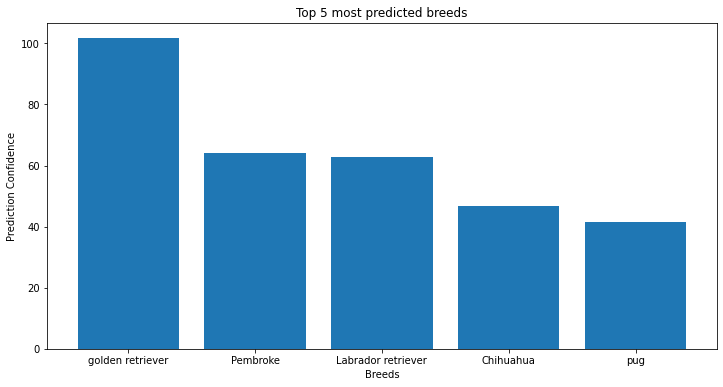

In [69]:
# Top 5 most predicted breed according to the algorithm 
plt.bar(breed_conf.breed[:5], breed_conf.conf[:5]);
plt.xlabel("Breeds")
plt.ylabel("Prediction Confidence")
plt.title("Top 5 most predicted breeds")

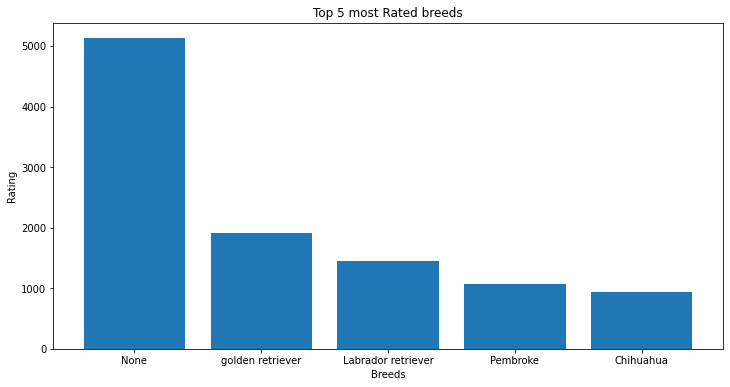

In [70]:
# Top 5 most rated breed
plt.bar(breed_rated.breed[:5], breed_rated.rating_numerators[:5]);
plt.xlabel("Breeds")
plt.ylabel("Rating")
plt.title("Top 5 most Rated breeds");